# Clean & Analyze Social Media

## **Introduction**

En la era digital, las marcas y empresas buscan estrategias efectivas para aumentar su alcance y engagement en redes sociales. Sin embargo, la falta de un enfoque basado en datos dificulta la selección de los influencers adecuados para campañas publicitarias. En Colombia, donde las redes sociales tienen un gran impacto en el comportamiento de consumo, identificar qué categorías de contenido generan más interacción y cómo los influencers optimizan sus publicaciones es clave para mejorar el rendimiento de las estrategias de marketing digital

### Pregunta principal del análisis


¿Cómo varía el engagement de los influencers colombianos en redes sociales según la categoría de contenido que publican, y qué estrategias pueden aplicarse para optimizar el alcance y la interacción de las marcas en estas plataformas?

### Preparación y Recolección de Datos

En esta etapa, descargaremos la base de datos de los 'Top 100 Social Media Influencers 2024 Countrywise' desde KaggleHub. Posteriormente, filtraremos los datos para seleccionar únicamente los influencers de Colombia. Esto nos permitirá analizar su desempeño en redes sociales y extraer información valiosa sobre las categorías de contenido que generan mayor engagement.

Pasos a seguir:
1. Descargar la base de datos utilizando KaggleHub.
2. Cargar los datos en un DataFrame de Pandas.
3. Seleccionar el archivo específico 'instagram_data_colombia.csv' ubicado en la carpeta 'colombia'.
4. Mostrar una vista previa de los datos con `.head()`

In [1]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\cubil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Descargar la ultima version del dataset
dataset_path = kagglehub.dataset_download("bhavyadhingra00020/top-100-social-media-influencers-2024-countrywise")
dataset_path
print("Path to dataset files:", dataset_path)

Path to dataset files: C:\Users\cubil\.cache\kagglehub\datasets\bhavyadhingra00020\top-100-social-media-influencers-2024-countrywise\versions\2


In [3]:
# Verificar la estructura del dataset descargado
print("Archivos y carpetas en el dataset:")
print(os.listdir(dataset_path))

Archivos y carpetas en el dataset:
['Top 100 Influencers']


In [4]:
# Definir la ruta dentro del dataset
influencers_path = os.path.join(dataset_path, "Top 100 Influencers")

# Listar los archivos dentro de la carpeta "Top 100 Influencers"
print("Archivos dentro de 'Top 100 Influencers':")
print(os.listdir(influencers_path))


Archivos dentro de 'Top 100 Influencers':
['afghanistan', 'aland-islands', 'all-countries', 'argentina', 'australia', 'austria', 'belgium', 'bolivia', 'brazil', 'canada', 'chile', 'colombia', 'costa-rica', 'czechia', 'denmark', 'dominican-republic', 'ecuador', 'egypt', 'el-salvador', 'finland', 'france', 'germany', 'greece', 'guatemala', 'hong-kong', 'india', 'indonesia', 'italy', 'japan', 'kuwait', 'lebanon', 'malaysia', 'mexico', 'morocco', 'netherlands', 'norway', 'pakistan', 'panama', 'paraguay', 'peru', 'philippines', 'poland', 'portugal', 'puerto-rico', 'romania', 'russia', 'saudi-arabia', 'singapore', 'slovakia', 'south-africa', 'south-korea', 'spain', 'sweden', 'switzerland', 'thailand', 'turkey', 'ukraine', 'united-arab-emirates', 'united-kingdom', 'united-states', 'uruguay']


In [5]:
# Definir la ruta de la carpeta de Colombia
colombia_path = os.path.join(dataset_path, "Top 100 Influencers", "colombia")

# Listar los archivos dentro de la carpeta Colombia
print("Archivos dentro de 'colombia':")
print(os.listdir(colombia_path))

Archivos dentro de 'colombia':
['instagram_data_colombia.csv', 'threads_data_colombia.csv', 'tiktok_data_colombia.csv', 'youtube_data_colombia.csv']


In [6]:
# Definir la ruta del archivo específico
instagram_file = os.path.join(dataset_path, "Top 100 Influencers", "colombia", "instagram_data_colombia.csv")

# Cargar el dataset en un DataFrame
df_colombia = pd.read_csv(instagram_file)

# Mostrar las primeras filas del DataFrame
df_colombia.head()

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH
0,1,KAROL G @karolg,68.3M,5.59%,Colombia,"Entertainment and Music Humor Film, Music & Bo...",20.5M
1,2,MALUMA @maluma,63.9M,1.27%,Colombia,Entertainment and Music Music Singer,19.2M
2,3,James Rodríguez @jamesrodriguez10,51.9M,1%,Colombia,Sports Soccer,15.6M
3,4,J Balvin @jbalvin,51.5M,0.52%,Colombia,Art Singer Entertainment Music,15.5M
4,5,Sofia Vergara @sofiavergara,30.9M,0.71%,Colombia,Entertainment and Music Actors Modeling Celebr...,9.3M


### **Exploracion de Datos**

En esta etapa, analizaremos la estructura del dataset para comprender mejor su contenido. Esto incluye:
1. Revisar la información general del DataFrame, como el tipo de datos y valores nulos.
2. Obtener estadísticas descriptivas para conocer distribuciones y tendencias.
3. Contar la cantidad de influencers por categoría para identificar qué tipo de contenido es más frecuente.

Este análisis nos ayudará a preparar los datos para su posterior limpieza y visualización

In [7]:
df_colombia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   #                   100 non-null    int64 
 1   NAME                100 non-null    object
 2   FOLLOWERS           100 non-null    object
 3   ER                  100 non-null    object
 4   COUNTRY             100 non-null    object
 5   TOPIC OF INFLUENCE  98 non-null     object
 6   POTENTIAL REACH     100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [8]:
df_colombia.describe()

,#
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


### **Limpieza de Datos**

En esta fase, realizaremos la limpieza de los datos para asegurarnos de que sean adecuados para el análisis. Esto incluye:
1. Eliminar valores nulos para evitar inconsistencias en el análisis.
2. Renombrar las columnas para mayor claridad.
3. Cambiar el índice del DataFrame utilizando la columna 'CLASIFICACION'.
4. Separar los valores de la columna 'TEMA' en listas individuales.

In [9]:
# Eliminar los datos que se encuentran con valores nulos
df_colombia.dropna(inplace=True)

In [10]:
# Renombrar las columnas a español
df_colombia.rename(columns={'#':'CLASIFICACION','NAME':'NOMBRE','FOLLOWERS':'NUM SEGUIDORES','ER': 'ENGAGEMENT', 'COUNTRY':'PAIS','TOPIC OF INFLUENCE':'TEMA','POTENTIAL REACH':'ALCANCE POTENCIALl'}, inplace=True)

In [11]:
# Cambiar el índice del DataFrame a la columna 'CLASIFICACION'
df_colombia.set_index('CLASIFICACION', inplace=True)
df_colombia.head()

,NOMBRE,NUM SEGUIDORES,ENGAGEMENT,PAIS,TEMA,ALCANCE POTENCIALl
CLASIFICACION,,,,,,
1,KAROL G @karolg,68.3M,5.59%,Colombia,"Entertainment and Music Humor Film, Music & Bo...",20.5M
2,MALUMA @maluma,63.9M,1.27%,Colombia,Entertainment and Music Music Singer,19.2M
3,James Rodríguez @jamesrodriguez10,51.9M,1%,Colombia,Sports Soccer,15.6M
4,J Balvin @jbalvin,51.5M,0.52%,Colombia,Art Singer Entertainment Music,15.5M
5,Sofia Vergara @sofiavergara,30.9M,0.71%,Colombia,Entertainment and Music Actors Modeling Celebr...,9.3M


In [12]:
# Definir las categorías predefinidas
categorias = ["Entertainment", "Music", "Humor", "Film", "Singer", "Sports", "Art", "Actors", "Modeling", "Books", "Celebrities", "Fitness and Health", "Food & Drink", "Acting and Drama", "Beauty and Self Care", "Business and Finance", "Arts and Crafts", "Animation and Cosplay", "Marketing and Advertising", "Virtualization", "Journalists", "Family Education", "Showcase", "Fashion and Accessories"]

# Crear nuevas columnas para las categorías
def categorizar_tema(tema):
    temas = tema.split(',') if isinstance(tema, str) else []
    return [categoria for categoria in categorias if any(categoria.lower() in t.lower() for t in temas)]

# Aplicar la categorización a cada fila
df_colombia['Categorias'] = df_colombia['TEMA'].apply(categorizar_tema)

# Expandir las categorías en columnas separadas
categorias_expandido = df_colombia['Categorias'].apply(pd.Series)
categorias_expandido.columns = [f'Categoria {i+1}' for i in range(categorias_expandido.shape[1])]

# Unir las nuevas columnas al DataFrame original
df_colombia = df_colombia.join(categorias_expandido).drop(columns=['TEMA', 'Categorias'])

# Mostrar las primeras filas después de la limpieza
print(df_colombia.head())

                                           NOMBRE NUM SEGUIDORES ENGAGEMENT  \
CLASIFICACION                                                                 
1                                 KAROL G @karolg          68.3M      5.59%   
2                                  MALUMA @maluma          63.9M      1.27%   
3              James Rodríguez @jamesrodriguez10          51.9M         1%   
4                               J Balvin @jbalvin          51.5M      0.52%   
5                     Sofia Vergara @sofiavergara          30.9M      0.71%   

                   PAIS ALCANCE POTENCIALl    Categoria 1 Categoria 2  \
CLASIFICACION                                                           
1              Colombia              20.5M  Entertainment       Music   
2              Colombia              19.2M  Entertainment       Music   
3              Colombia              15.6M         Sports         NaN   
4              Colombia              15.5M  Entertainment       Music   
5       

### **Visualización y Análisis de Datos**

En esta etapa, utilizaremos gráficos y estadísticas para responder la pregunta clave del análisis:
**¿Cómo varía el engagement de los influencers colombianos en redes sociales según la categoría de contenido que publican?**

Pasos a seguir:
1. **Histogramas** para analizar la distribución del engagement y seguidores.
2. **Boxplots** para comparar el engagement entre diferentes categorías.
3. **Cálculo de estadísticas clave**, como la media de engagement por categoría, para identificar qué tipo de contenido genera mayor interacción

In [13]:
# Convertir Engagement Rate de porcentaje a float
df_colombia['ENGAGEMENT'] = df_colombia['ENGAGEMENT'].str.replace('%', '').astype(float) / 100

# Crear grupos de engagement en intervalos de 0.5
df_colombia['ENGAGEMENT_GROUP'] = pd.cut(df_colombia['ENGAGEMENT'], bins=[i/100 for i in range(0, 55, 5)], right=False)

In [14]:
df_colombia.head()

,NOMBRE,NUM SEGUIDORES,ENGAGEMENT,PAIS,ALCANCE POTENCIALl,Categoria 1,Categoria 2,Categoria 3,Categoria 4,Categoria 5,Categoria 6,ENGAGEMENT_GROUP
CLASIFICACION,,,,,,,,,,,,
1,KAROL G @karolg,68.3M,0.0559,Colombia,20.5M,Entertainment,Music,Humor,Film,Books,Celebrities,"[0.05, 0.1)"
2,MALUMA @maluma,63.9M,0.0127,Colombia,19.2M,Entertainment,Music,Singer,NaN,NaN,NaN,"[0.0, 0.05)"
3,James Rodríguez @jamesrodriguez10,51.9M,0.0100,Colombia,15.6M,Sports,NaN,NaN,NaN,NaN,NaN,"[0.0, 0.05)"
4,J Balvin @jbalvin,51.5M,0.0052,Colombia,15.5M,Entertainment,Music,Singer,Art,NaN,NaN,"[0.0, 0.05)"
5,Sofia Vergara @sofiavergara,30.9M,0.0071,Colombia,9.3M,Entertainment,Music,Actors,Modeling,Celebrities,NaN,"[0.0, 0.05)"


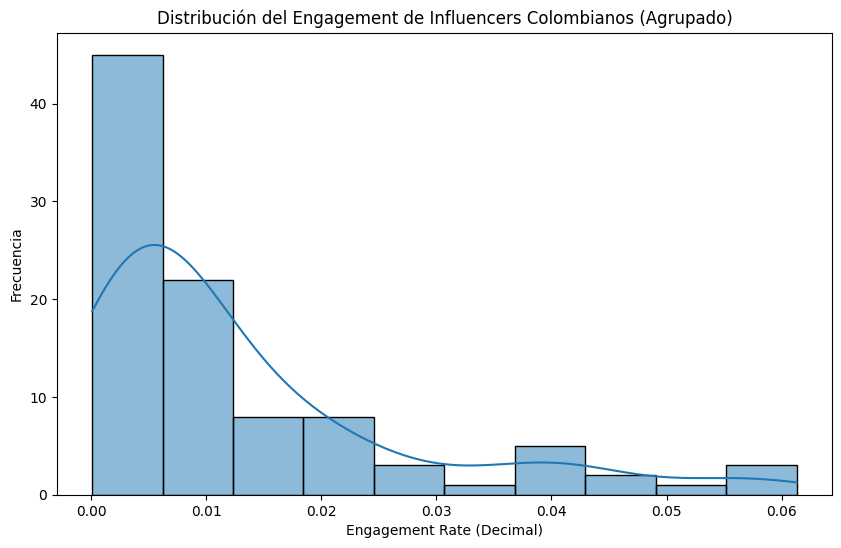

In [16]:
# Visualización de la distribución del engagement con intervalos
plt.figure(figsize=(10,6))
sns.histplot(df_colombia, x='ENGAGEMENT', bins=10, kde=True)
plt.title('Distribución del Engagement de Influencers Colombianos (Agrupado)')
plt.xlabel('Engagement Rate (Decimal)')
plt.ylabel('Frecuencia')
plt.show()

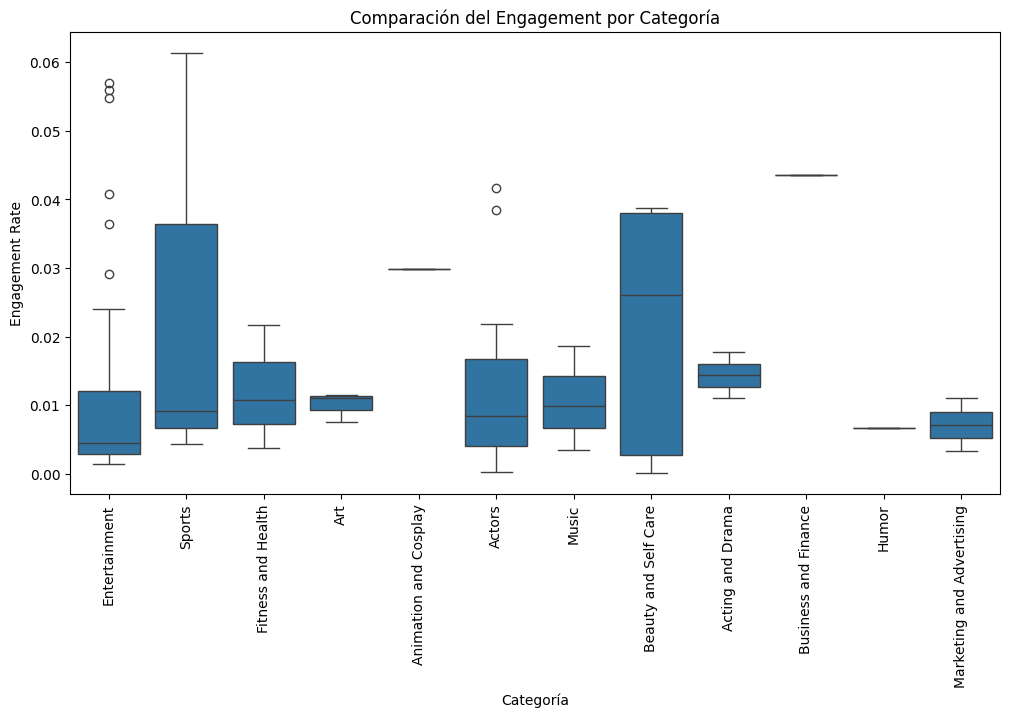

In [17]:
# Boxplot del engagement por categoría
plt.figure(figsize=(12,6))
sns.boxplot(x='Categoria 1', y='ENGAGEMENT', data=df_colombia)
plt.xticks(rotation=90)
plt.title('Comparación del Engagement por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Engagement Rate')
plt.show()

In [18]:
# Cálculo de la media de engagement por categoría
engagement_por_categoria = df_colombia.groupby('Categoria 1')['ENGAGEMENT'].mean().sort_values(ascending=False)
print("Media de Engagement por Categoría:")
print(engagement_por_categoria)

Media de Engagement por Categoría:
Categoria 1
Business and Finance         0.043500
Animation and Cosplay        0.029900
Sports                       0.022533
Beauty and Self Care         0.021120
Acting and Drama             0.014350
Fitness and Health           0.012067
Actors                       0.011823
Entertainment                0.011405
Music                        0.010633
Art                          0.010033
Marketing and Advertising    0.007150
Humor                        0.006600
Name: ENGAGEMENT, dtype: float64


### **Conclusiones**

**Categorías con mayor engagement:**
   - Las categorías relacionadas con **Deportes, Música y Beauty & Self Care** muestran valores altos de engagement, aunque con variabilidad en los datos.
   - Influencers en **Fitness & Health y Business & Finance** tienen un engagement más bajo, lo que sugiere que el público responde mejor a contenido de entretenimiento y estilo de vida.

2. **Distribución del engagement:**
   - La mayor parte de los influencers tienen un engagement menor al **2%**, con casos excepcionales por encima del **5%**.
   - Se observa que los influencers más seguidos no necesariamente tienen el mayor engagement, lo que refuerza la importancia de la calidad del contenido sobre la cantidad de seguidores.

3. **Relación entre categorías y engagement:**
   - Las categorías **Deportes y Beauty & Self Care** tienen una alta variabilidad en su engagement, lo que indica que algunos influencers destacan con interacciones excepcionales mientras que otros no.
   - Algunas categorías como **Marketing y Publicidad** presentan niveles de engagement más bajos, lo que sugiere que requieren estrategias más especializadas.

4. **Estrategias recomendadas:**
   - **Optimización del contenido:** Las marcas deben alinear su estrategia con categorías de alto engagement para maximizar la interacción.
   - **Selección estratégica de influencers:** No solo basarse en el número de seguidores, sino en la tasa de engagement.
   - **Uso de microinfluencers:** Aquellos con audiencias más pequeñas pero comprometidas pueden ofrecer mejores resultados en ciertos nichos. En categorías como **Beauty & Self Care o Deportes**, estos influencers pueden alcanzar tasas de engagement más altas.
   - **Medición continua:** Implementar análisis constantes para evaluar el desempeño y ajustar estrategias en función de los cambios en tendencias y preferencias del público.

Estas conclusiones ayudan a comprender qué tipos de influencers y contenidos son más efectivos para generar interacción en redes sociales en Colombia, proporcionando un enfoque basado en datos para futuras campañas de marketing digital.
